<a href="https://colab.research.google.com/github/katherymbr/ML-TP2_Clasificaci-n-estadistica-y-medidas-de-evaluaci-n-de-modelos/blob/main/ML_TP2_Casos_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

APRENDIZAJE DE MÁQUINAS (ML)
---

PRACTICO No. 2.




---


**Clasificación estadistica y medidas de evaluación de modelos**
---


```
Estudiante: Katherym Bambague Ruíz
```



**OBJETIVO DE LA PRÁCTICA**

*  Ejercicio 1:  
Descargar datasets de la situación epidemiológica y sanitaria relacionada con el covid en Bahía Blanca en los últimos meses (fuente https://datos.bahia.gob.ar/dataset?groups=covid19).
Las variables son discretas (personas) pero se puede aplicar razonablemente el análisis estadístico como si fuesen valores continuos.
Hay variables que puedan ser razonablemente consideradas normales? Hay variables que tienen un comportamiento sospechoso?

*  Ejercicio 2:
 Generar un dataset similar al de la pág. 12 (dos conjuntos Gaussianos con diferente media y DS, N=50 c/u, uno con etiqueta A y otro con etiqueta B).
Utilizar la curva ROC para proponer un umbral para un clasificador por mínimo error. Evaluar algunos de los parámetros de calidad (exactitud, precisión, f-measure).
Recalcular para algunas variantes (por ejemplo, acercando las medias de los grupos A y B, cambiando el valor umbral, etc.).
Cómo podrían hacer no supervisado este proceso?


# Ejercicio 1

In [1]:
# Importo las librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import seaborn as sns 

# a). Accedo a la página de CASOS COVID

In [2]:
covid_casos_url= 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv'
covid_casos_df = pd.read_csv(covid_casos_url)
print(covid_casos_url)

https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv


In [3]:
# imprimo los primeros 10 casos de CASOS COVID
covid_casos_df.head(10) 

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0
5,2020-07-05,159,74,79,6,635,37,356,1934,181,0
6,2020-07-06,177,91,80,6,646,52,371,1966,247,0
7,2020-07-07,188,97,84,7,669,57,371,2001,252,0
8,2020-07-08,209,109,93,7,687,55,371,2018,242,0
9,2020-07-09,233,130,96,7,710,56,371,1264,297,0


In [4]:
# Obtengo los parametros estadisticos de CASOS COVID
estadistica_casos= covid_casos_df. describe()
estadistica_casos

,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.0
mean,944.977273,403.738636,516.238636,25.000000,2007.647727,157.613636,407.295455,1360.386364,287.920455,0.0
std,741.951512,377.382561,369.502430,16.613248,951.537510,101.144080,21.174241,289.810181,113.161691,0.0
min,106.000000,29.000000,71.000000,6.000000,574.000000,22.000000,342.000000,1014.000000,169.000000,0.0
25%,422.000000,201.250000,164.000000,13.000000,1159.250000,96.000000,417.000000,1215.000000,206.250000,0.0
50%,706.500000,238.000000,502.000000,20.000000,1999.500000,122.000000,417.000000,1280.000000,246.500000,0.0
75%,1262.750000,487.750000,742.250000,32.750000,2794.500000,232.250000,417.000000,1374.750000,370.500000,0.0
max,3012.000000,1512.000000,1434.000000,66.000000,3738.000000,382.000000,417.000000,2377.000000,625.000000,0.0


**PROCEDIMIENTO**: para ver los datos de cada columna en función de la variable temporal hago uso del datatime, el cual muestra una fecha en función de dias, semanas, meses, etc

> Bloc con sangría



In [5]:
covid_casos_df['fecha'] = pd.to_datetime(covid_casos_df['fecha'])
covid_casos_df['mes'] = covid_casos_df['fecha'].dt.month
covid_casos_df['semana'] = covid_casos_df['fecha'].dt.week
covid_casos_df['dia_semana'] = covid_casos_df['fecha'].dt.weekday + 1
covid_casos_df.head(11)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos,mes,semana,dia_semana
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0,6,27,2
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0,7,27,3
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0,7,27,4
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0,7,27,5
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0,7,27,6
5,2020-07-05,159,74,79,6,635,37,356,1934,181,0,7,27,7
6,2020-07-06,177,91,80,6,646,52,371,1966,247,0,7,28,1
7,2020-07-07,188,97,84,7,669,57,371,2001,252,0,7,28,2
8,2020-07-08,209,109,93,7,687,55,371,2018,242,0,7,28,3
9,2020-07-09,233,130,96,7,710,56,371,1264,297,0,7,28,4


* Graficas: Realizo las graficas con el tiempo en semanas, para ser más visible la tendencia de los datos

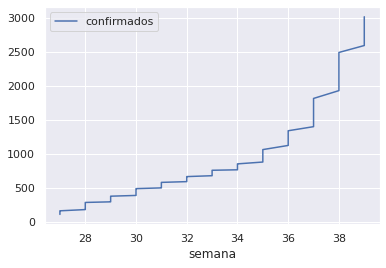

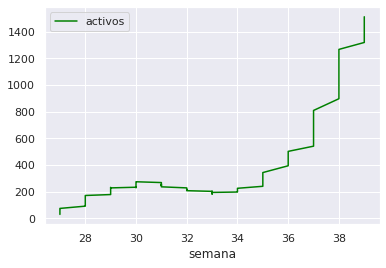

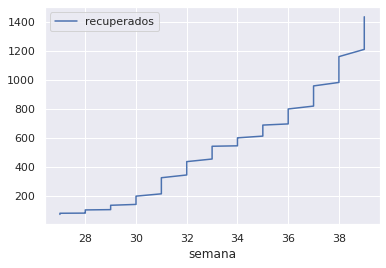

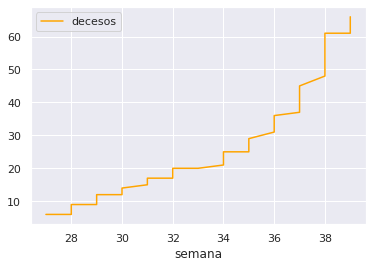

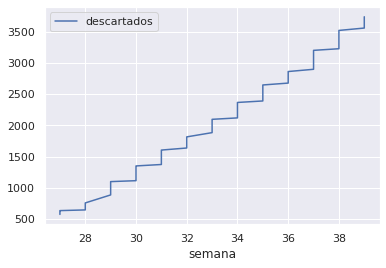

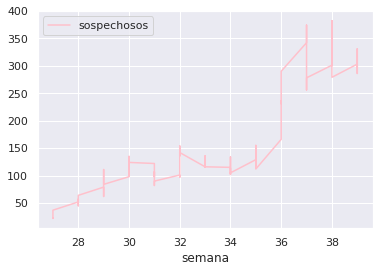

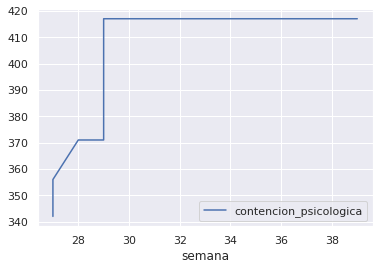

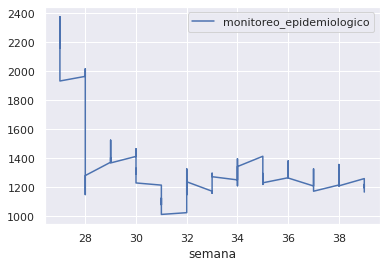

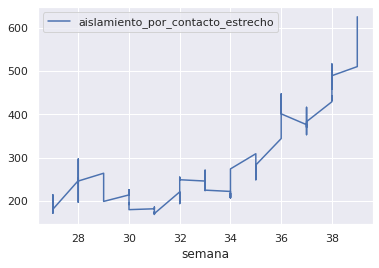

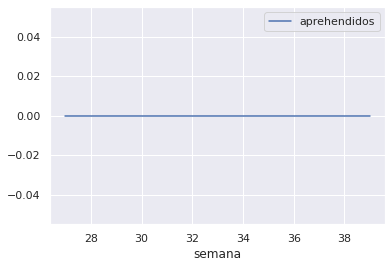

In [6]:
sns.set(style="darkgrid")
covid_casos_df.plot.line(y="confirmados", x="semana")
covid_casos_df.plot.line(y="activos", x="semana", c='green')
covid_casos_df.plot.line(y="recuperados", x="semana")
covid_casos_df.plot.line(y="decesos", x="semana",  c='orange')
covid_casos_df.plot.line(y="descartados", x="semana")
covid_casos_df.plot.line(y="sospechosos", x="semana",  c='pink')
covid_casos_df.plot.line(y="contencion_psicologica", x="semana")
covid_casos_df.plot.line(y="monitoreo_epidemiologico", x="semana")
covid_casos_df.plot.line(y="aislamiento_por_contacto_estrecho", x="semana")
covid_casos_df.plot.line(y="aprehendidos", x="semana")

**Análisis:** En las graficas se puede observar que desde la semana 37 , los casos ACTIVOS de COVID-19 aumentaron considerablemente, lo que coincidió con la tendencia al alza en los casos CONFIRMADOS, que se dispararon apartir de la semana 36. El numero de recuperados a partir de la semana 38 aumento, es decir hubo mas casos activos, pero tambien una gran cantidad de perosnas recuperadas. Los datos de la grafica de los casos sospechosos no represneta ninguna tendencia o comportamiento predictivo. LLama la atención que los casos descartados no presentan gran variación e incrementan de una forma proporcional. No es muy claro el compotamiento del atributo contención psicologica el cual permanecio constantante en dos periodos de tiempo.



# b). Accedo a la página de CAMAS COVID

In [7]:
covid_camas_url= 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv'
covid_camas_df = pd.read_csv(covid_camas_url)
print(covid_camas_url)

https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv


In [8]:
# imprimo los primeros 10 casos de CASOS COVID
covid_camas_df.head(11) 

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,131,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN
2,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
3,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
4,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN
5,126,2020-09-20,848,368,43,163,29,75,63,33,23,142,36,70,22,147,16,4,NaN
6,125,2020-09-19,848,373,43,163,15,83,60,32,20,142,34,68,20,147,15,4,NaN
7,124,2020-09-18,0,0,0,0,0,0,0,24,18,0,0,64,16,147,13,4,Sin información del Hospital Municipal. \nPor ...
8,123,2020-09-17,848,424,50,163,25,71,58,32,21,142,39,67,19,147,7,4,NaN
9,122,2020-09-16,848,419,49,163,18,71,54,32,17,142,41,67,19,147,9,4,NaN


In [9]:
#Obtengo los parametros estadisticos de 
estadistica_camas= covid_camas_df. describe()
estadistica_camas

,informeNumero,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,70.670455,817.500000,350.159091,40.920455,162.068182,19.647727,34.909091,32.795455,31.636364,8.170455,137.181818,24.284091,39.943182,8.386364,144.159091,5.170455,3.715909
std,42.113072,155.002113,77.216502,9.006028,18.349603,6.586367,21.706843,15.509107,1.598719,7.014307,26.004220,8.541917,27.322408,7.529912,4.535648,4.334363,0.453565
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,0.000000,3.000000
25%,30.750000,848.000000,325.750000,38.000000,163.000000,15.750000,20.000000,22.000000,32.000000,3.000000,142.000000,20.000000,0.000000,0.000000,137.000000,3.000000,3.000000
50%,87.500000,848.000000,367.500000,43.000000,163.000000,18.000000,25.000000,26.500000,32.000000,4.500000,142.000000,25.000000,54.000000,7.500000,147.000000,4.000000,4.000000
75%,109.250000,848.000000,391.000000,46.000000,163.000000,23.000000,52.250000,44.250000,32.000000,13.250000,142.000000,28.000000,62.000000,14.000000,147.000000,6.000000,4.000000
max,131.000000,851.000000,450.000000,53.000000,177.000000,42.000000,86.000000,77.000000,33.000000,24.000000,143.000000,43.000000,72.000000,25.000000,147.000000,21.000000,4.000000


* Graficas: Realizo las gráficas de camas covid en funcion de la fecha

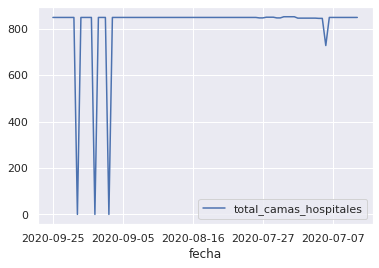

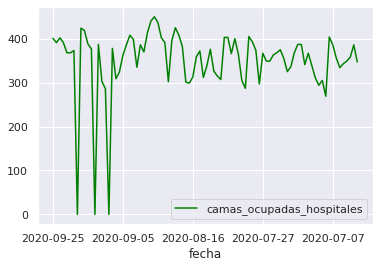

In [10]:
sns.set(style="darkgrid")
covid_camas_df.plot.line(y="total_camas_hospitales", x="fecha")
covid_camas_df.plot.line(y="camas_ocupadas_hospitales", x="fecha", c='green')

*  Al realizar el procediemiento anterior, nos podemos dar cuento que no es muy optimo ya que hay una gran cantidad de datos y un mayor nro de columnas, por lo cual para este dataset (camas_covid_df), realizamos graficos de series temporales

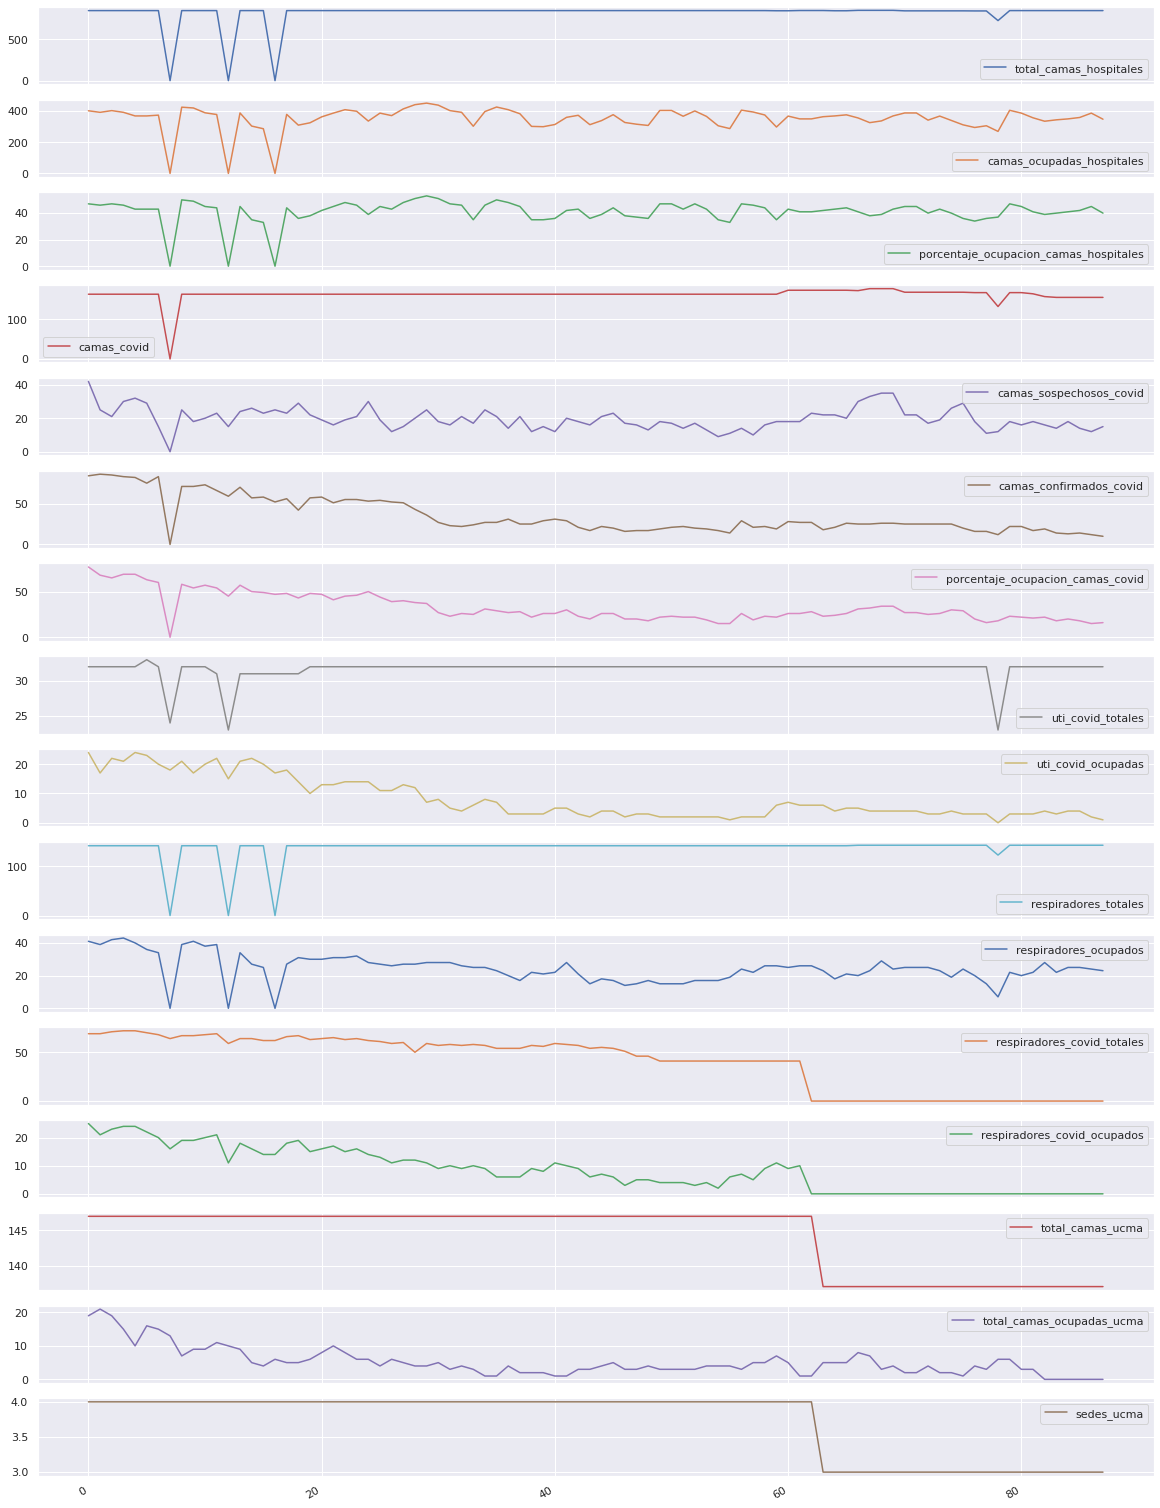

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# excluyo 2 columnas mediante el método drop
da2 = covid_camas_df.drop(['informeNumero', 'fecha'], axis=1)
da2.plot(label='fecha', subplots=True,figsize=(20,30))
plt.show()

*  Conclusión: El dataset de camas Covid, presenta una serie de novedades, como es el caso de la gráfica de 'total_camas_hospitales', donde se observa que en los mese de julio y septiembre, las camas desaparecen y aparecen de forma inmediata, por lo cual apriori se puede decir que estos datos presentan una irregularidad, al igual que 'camas_ocupadas','porcentaje de ocupación' y 'camas_covid'. Esta misma anomalidad aparece en 'respiradores totales'.

# Ejercicio 2

Generar un dataset similar al de la pág. 12 de este apunte (dos conjuntos Gaussianos con diferente media y DS, N=50 c/u, uno con etiqueta A y otro con etiqueta B).
Utilizar la curva ROC para proponer un umbral para un clasificador por mínimo error. Evaluar algunos de los parámetros de calidad (exactitud, precisión, f-measure).

In [12]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

*  Generación del Dataset con la etiqueta A y B

In [13]:
N_data = 50
mediaA = 2
desvA = 0.4
mediaB = 3.5
desvB = 0.6

In [14]:
XA, XB = np.random.normal(loc= mediaA, scale=desvA, size=N_data), np.random.normal(loc= mediaB, scale=desvB, size=N_data)
dfA, dfB = pd.DataFrame({'Etiqueta':'A','Valor': XA}), pd.DataFrame({'Etiqueta':'B','Valor': XB})
df = pd.concat([dfA,dfB], ignore_index= True, axis=0)
df = df.sample(n = N_data*2) 
df.head(10)

,Etiqueta,Valor
39,A,2.033794
85,B,3.932906
41,A,1.791988
49,A,1.790024
77,B,4.362769
32,A,2.190989
27,A,2.772867
60,B,2.902222
93,B,3.139206
91,B,3.242666


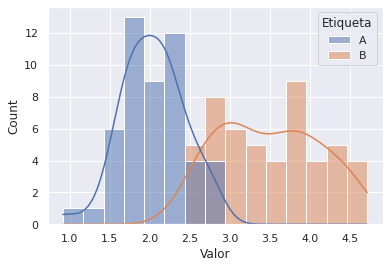

In [15]:
sns.histplot(data=df, x = "Valor", hue = "Etiqueta", bins=15, kde=True)

Se realizó una clasificación en función de la media y desviación de los dos Targets

In [16]:
claseA = mediaA + 2*desvA
claseB = mediaB - 2*desvB
print(claseA, claseB)

2.8 2.3


In [17]:
Umbral_clasicacion = (claseA+claseB)/2
Umbral_clasicacion 

2.55

Clasicador por minimo error, a partir del umbral encontrado

In [18]:
predictor = df.copy()
predictor['Target'] = [0 if x == 'A' else 1 for x in predictor['Etiqueta']]
if mediaA < mediaB: 
  predictor['Prediccion'] = [0 if x < Umbral_clasicacion else 1 for x in predictor['Valor']]
else:
  predictor['Prediccion'] = [1 if x < Umbral_clasicacion else 0 for x in predictor['Valor']]

*  Curva ROC

Umbral = 2.55 accuracy = 0.92 precision = 0.904 recall 


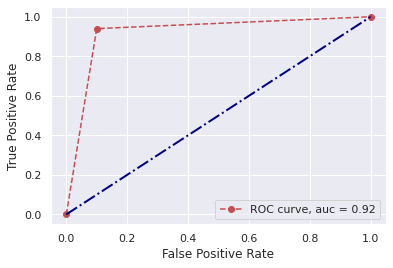

In [19]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(predictor['Target'],  predictor['Prediccion'])
auc = metrics.roc_auc_score(predictor['Target'],  predictor['Prediccion'])
acc = metrics.accuracy_score(predictor['Target'],  predictor['Prediccion']).round(3)
precision = metrics.precision_score(predictor['Target'],  predictor['Prediccion']).round(3)
recall = metrics.recall_score(predictor['Target'],  predictor['Prediccion']).round(3)
print('Umbral = '+str(Umbral_clasicacion )+' accuracy = '+str(acc)+' precision = '+str(precision)+ ' recall ')

plt.plot(fpr,tpr, 'ro--', label="ROC curve, auc = "+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='-.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

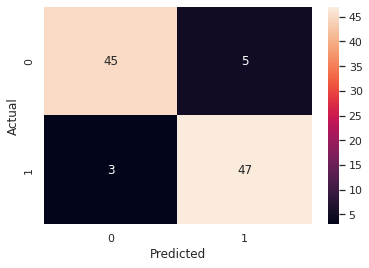

In [20]:
confusion_matrix = pd.crosstab(predictor['Target'], predictor['Prediccion'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

Ahora Verificamos los parametros de calidad del modelo de minimo error en funcion del umbral, en un rango menor y mayor. Con el objetivo de encontrar un mejor umbral.

Umbral = 1.75 accuracy = 0.62 precision = 0.568 recall 1.0


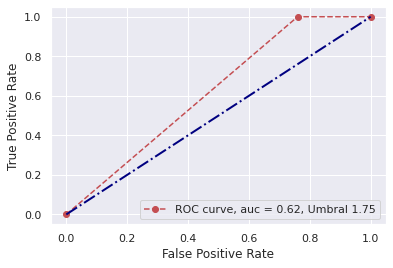

Umbral = 1.85 accuracy = 0.66 precision = 0.595 recall 1.0


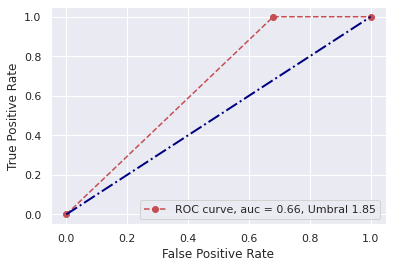

Umbral = 1.95 accuracy = 0.72 precision = 0.641 recall 1.0


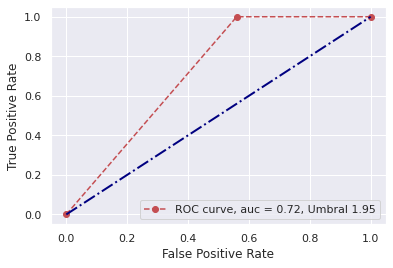

Umbral = 2.05 accuracy = 0.77 precision = 0.685 recall 1.0


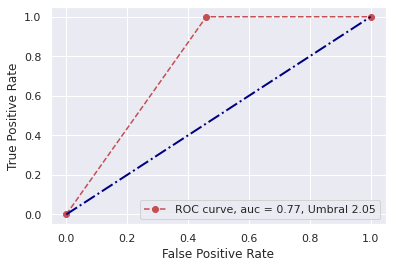

Umbral = 2.15 accuracy = 0.78 precision = 0.694 recall 1.0


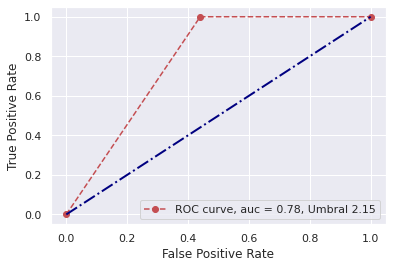

Umbral = 2.25 accuracy = 0.88 precision = 0.806 recall 1.0


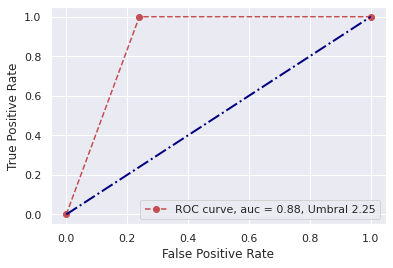

Umbral = 2.35 accuracy = 0.9 precision = 0.833 recall 1.0


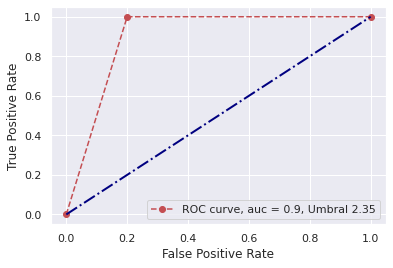

Umbral = 2.45 accuracy = 0.92 precision = 0.862 recall 1.0


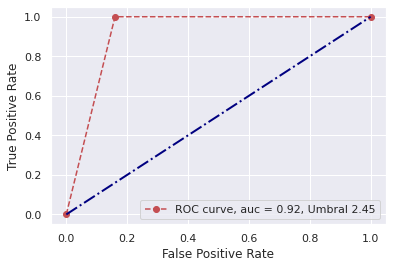

Umbral = 2.55 accuracy = 0.92 precision = 0.904 recall 0.94


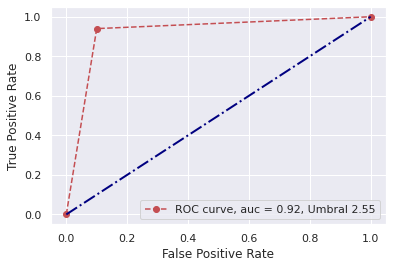

Umbral = 2.65 accuracy = 0.92 precision = 0.92 recall 0.92


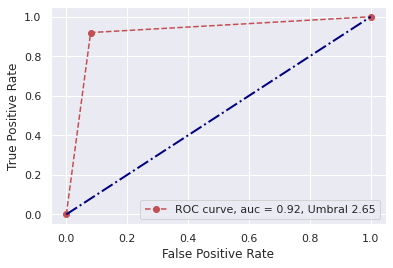

Umbral = 2.75 accuracy = 0.92 precision = 0.938 recall 0.9


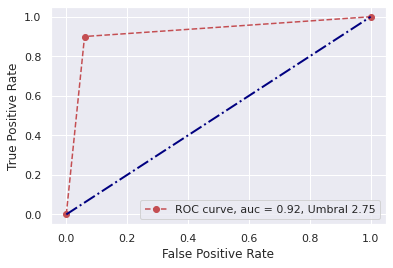

Umbral = 2.85 accuracy = 0.91 precision = 1.0 recall 0.82


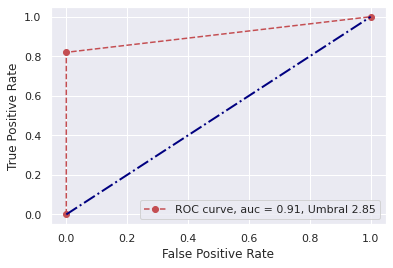

Umbral = 2.95 accuracy = 0.87 precision = 1.0 recall 0.74


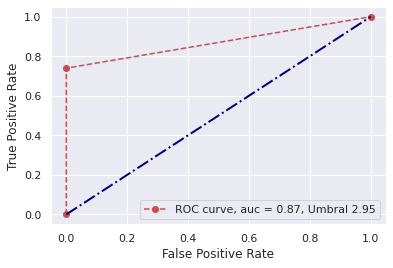

Umbral = 3.05 accuracy = 0.86 precision = 1.0 recall 0.72


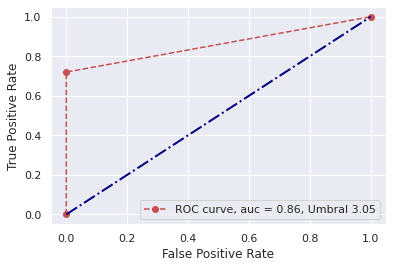

Umbral = 3.15 accuracy = 0.81 precision = 1.0 recall 0.62


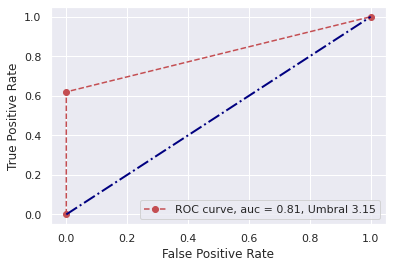

Umbral = 3.25 accuracy = 0.78 precision = 1.0 recall 0.56


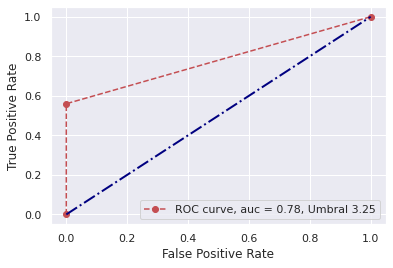

In [21]:
List_umbral = np.arange(Umbral_clasicacion-2*desvA, Umbral_clasicacion+2*desvA, 0.1).round(3)
predictor = df.copy()
predictor['Target'] = [0 if x == 'A' else 1 for x in predictor['Etiqueta']]

for a in List_umbral:
  
  if mediaA < mediaB: 
    predictor['Prediccion'+'_umbral_'+str(a)] = [0 if x < a else 1 for x in predictor['Valor']]
  else:
    predictor['Prediccion'+'_umbral_'+str(a)] = [1 if x < a else 0 for x in predictor['Valor']]
  
  acc = metrics.accuracy_score(predictor['Target'],  predictor['Prediccion'+'_umbral_'+str(a)]).round(3)
  precision = metrics.precision_score(predictor['Target'],  predictor['Prediccion'+'_umbral_'+str(a)]).round(3)
  recall = metrics.recall_score(predictor['Target'],  predictor['Prediccion'+'_umbral_'+str(a)]).round(3)
  print('Umbral = '+str(a)+' accuracy = '+str(acc)+' precision = '+str(precision)+ ' recall '+str(recall))

  fpr, tpr, _ = metrics.roc_curve(predictor['Target'],  predictor['Prediccion'+'_umbral_'+str(a)])
  auc = metrics.roc_auc_score(predictor['Target'],  predictor['Prediccion'+'_umbral_'+str(a)]).round(2)
  plt.plot(fpr,tpr, 'ro--', label="ROC curve, auc = " + str(auc) + ',' + ' Umbral ' + str(a))
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='-.')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc=4)
  plt.show()